# "Alternate AA index and Fourier Transform"
>Hydrophobicity Index and Fast Fourier Transform

- toc: true 
- badges: true
- comments: true
- categories: [Part-4 - Hydrophobicity index and FFT]




## Alternate AAindex - Hydrophobicity

In this post, we will be trying an alternative AAindex - Amino Acid Index - called Hydrophobicity index and also look into incorporating Fourier Transform into the proceedings. 

The First Section will just be a repeat of the Data Engineering process already introduced in the previous sections of the blog, with the only edit being that we are using a different AAindex. So, please feel free to skip to the Linear Regression section.  

In [1]:
import pandas as pd
import numpy as np

In [2]:
h_index = pd.read_csv("hydrophobicity_index.csv")

In [9]:
h_index.iloc[:1]

,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V
0,0.61,0.6,0.06,0.46,1.07,0.0,0.47,0.07,0.61,2.22,1.53,1.15,1.18,2.02,1.95,0.05,0.05,2.65,1.88,1.32


In [10]:
h_dict = {}
for i in h_index.columns:
    h_dict[i] = h_index[i][0]

Dictionary with the Hydrophobicity indexes

In [11]:
#Dictionary with hydrophobicity indexes
h_dict

{'A': 0.61,
 'R': 0.6,
 'N': 0.06,
 'D': 0.46,
 'C': 1.07,
 'Q': 0.0,
 'E': 0.47,
 'G': 0.07,
 'H': 0.61,
 'I': 2.22,
 'L': 1.53,
 'K': 1.15,
 'M': 1.18,
 'F': 2.02,
 'P': 1.95,
 'S': 0.05,
 'T': 0.05,
 'W': 2.65,
 'Y': 1.88,
 'V': 1.32}

In [72]:
train_data = pd.read_csv("ee_train.csv")
test_data = pd.read_csv("ee_test.csv")
print(train_data)
print(test_data)

  Type   Sequence  EE     G
0   WT  LARLTTMLC   4 -0.85
1    1  FARLTTMLC  12 -1.50
2    2  LNRLTTMLC   7 -1.17
3    3  LASLTTMLC   4 -0.85
4    4  LARYTTMLC   4 -0.85
5    5  LARLWTMLC  12 -1.50
6    6  LARLTVMLC   4 -0.85
7    7  LARLTTPLC   6 -1.08
8    8  LARLTTMYC   4 -0.85
9    9  LARLTTMLV   5 -0.97
     Sequence     G
0   FNSLTTMLC -1.68
1   LARLTTPYC -0.87
2   LARLWVMLC -1.68
3   FNSLTTPYC -1.84
4   FNSLTTMLV -1.67
5   FNSLWVMLC -2.19
6   FNSYTTMLC -1.93
7   LARLTTPYV -0.90
8   LARLWVPYC -1.30
9   LARYTTPYC -0.98
10  LARLWVMLV -1.73
11  LARYTTMLV -0.89
12  LARYWVMLC -1.88
13  FNSLTTPYV -1.92
14  FNSLWVPYC -2.15
15  FNSYTTPYC -1.96
16  FNSLWVMLV -2.41
17  FNSYTTMLV -1.85
18  FNSYWVMLC -2.37
19  LARLWVPYV -1.51
20  LARYTTPYV -0.92
21  LARYWVPYC -1.75
22  LARYWVMLV -1.74
23  FNSYTTPYV -2.57
24  FNSLWVPYV -2.09
25  FNSYWVPYC -2.32
26  FNSYWVMLV -2.73
27  FNSYWVPYV -2.87


In [73]:
#Converting sequence to hydrophobicity indexes
def convert_seq(x):
    list_seq = []
    for i in x:
        list_seq.append(h_dict[i])
    return list_seq
        

In [74]:
print(convert_seq('LARLTTMLC'))

[1.53, 0.61, 0.6, 1.53, 0.05, 0.05, 1.18, 1.53, 1.07]


In [75]:
x_train = list(map(convert_seq,train_data["Sequence"]))
x_test = list(map(convert_seq,test_data["Sequence"]))

In [76]:
x_train

[[1.53, 0.61, 0.6, 1.53, 0.05, 0.05, 1.18, 1.53, 1.07],
 [2.02, 0.61, 0.6, 1.53, 0.05, 0.05, 1.18, 1.53, 1.07],
 [1.53, 0.06, 0.6, 1.53, 0.05, 0.05, 1.18, 1.53, 1.07],
 [1.53, 0.61, 0.05, 1.53, 0.05, 0.05, 1.18, 1.53, 1.07],
 [1.53, 0.61, 0.6, 1.88, 0.05, 0.05, 1.18, 1.53, 1.07],
 [1.53, 0.61, 0.6, 1.53, 2.65, 0.05, 1.18, 1.53, 1.07],
 [1.53, 0.61, 0.6, 1.53, 0.05, 1.32, 1.18, 1.53, 1.07],
 [1.53, 0.61, 0.6, 1.53, 0.05, 0.05, 1.95, 1.53, 1.07],
 [1.53, 0.61, 0.6, 1.53, 0.05, 0.05, 1.18, 1.88, 1.07],
 [1.53, 0.61, 0.6, 1.53, 0.05, 0.05, 1.18, 1.53, 1.32]]

In [77]:
y_train = train_data["G"]


In [78]:
y_test = test_data["G"]

## Simple Linear Regression ##


In [79]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 

In [80]:
#fitting the model
reg.fit(x_train,y_train)

LinearRegression()

In [81]:
prediction = reg.predict(x_test)

In [82]:
print(prediction)

[-1.82 -1.08 -1.5  -2.05 -1.94 -2.47 -1.82 -1.2  -1.73 -1.08 -1.62 -0.97
 -1.5  -2.17 -2.7  -2.05 -2.59 -1.94 -2.47 -1.85 -1.2  -1.73 -1.62 -2.17
 -2.82 -2.7  -2.59 -2.82]


**R2 Score for Test Set**

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.730824152182818

As promised, i did try the same simple linear regression model with another AAindex and we get results similar to the one we obtained with the EIIP AAindex and the One-Hot model. This trend continues throughout for the closed form linear regression model, and hence we will not be considering it for our task.

## SVR 

In [84]:
from sklearn.svm import SVR

The parameters we are considering for SVR

In [85]:
parameters = ['linear','poly','rbf','sigmoid']

**Default SVR**

In [86]:
svr = SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))

0.6209572424941144


In [87]:
svr.predict(x_test)

array([-1.17149025, -0.98769153, -1.30984363, -1.16435546, -1.17187482,
       -1.29976936, -1.15932717, -0.99132529, -1.28701036, -0.98135599,
       -1.3077824 , -0.95447213, -1.30433144, -1.16486616, -1.27907534,
       -1.15482163, -1.29788623, -1.15992676, -1.2949261 , -1.28535278,
       -0.98510175, -1.28256079, -1.30236765, -1.15550087, -1.27755803,
       -1.27516159, -1.29312858, -1.27371347])

**Test Score for the default SVR**

In [88]:
print(svr.score(x_test,y_test))

-1.0037826636263079


**5 - Fold Cross Validation**

In [89]:
from sklearn.model_selection import KFold
x = np.array(x_train + x_test)
y = np.array(y_train.tolist() + y_test.tolist())

The following method of 5-fold cross validation for finding the ideal parameter, is repeated across all the experiments with different AAindexes. 

In [90]:
kf = KFold(n_splits= 5,shuffle = True,random_state = 40)

train_sets_x = []
train_sets_y = []
test_sets_x = []
test_sets_y = []
for train,test in kf.split(x):
    
    train_sets_x.append(x[train])
    train_sets_y.append(y[train])
    test_sets_x.append(x[test])
    test_sets_y.append(y[test])
    

In [91]:
def avg(x):
    return sum(x)/len(x)

In [92]:
scores_train = {}
scores_test = {}
for i in parameters:
    n = 0
    svr = SVR(kernel = i)
    demo_test = []
    demo_train = []
    while n < 5:
        x_train_k = train_sets_x[n]
        y_train_k = train_sets_y[n]
        x_test_k = test_sets_x[n]
        y_test_k = test_sets_y[n]
        svr.fit(x_train_k,y_train_k)
        demo_train.append(svr.score(x_train_k,y_train_k))
        demo_test.append(svr.score(x_test_k,y_test_k))
        n+=1
    scores_train[i] = avg(demo_train)
    scores_test[i] = avg(demo_test)

**Average Training Scores for each of the Kernels**

In [93]:
scores_train

{'linear': 0.9094324956856991,
 'poly': 0.9666186481450667,
 'rbf': 0.8924190599961588,
 'sigmoid': 0.03987006846426018}

**Average Test Scores for each of the Kernels**

In [94]:
scores_test

{'linear': 0.828073023893024,
 'poly': 0.8944167592225953,
 'rbf': 0.8514916868496585,
 'sigmoid': -0.4109411142456857}

From the above scores, it is evident that the polynomial kernel performs the best. So, we are going to go with that.

**Training Score for the polynomial kernel**

In [95]:
svr = SVR(kernel = "poly")
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))

0.8755959967194292


**Test Score for the polynomial kernel**

In [96]:
print(svr.score(x_test,y_test))

0.6723543903416969


In [97]:
svr.predict(x_test)

array([-1.46114467, -1.02375865, -1.40385193, -1.67735176, -1.50871657,
       -1.93812487, -1.51127952, -1.04666127, -1.57058112, -1.01227782,
       -1.44309145, -0.97118722, -1.43612546, -1.72874969, -2.25041533,
       -1.72276683, -2.00312591, -1.55897144, -2.02189508, -1.61201774,
       -1.03372668, -1.59476383, -1.47486817, -1.77391459, -2.3208858 ,
       -2.33256065, -2.08760292, -2.40336772])

The epistatic interaction study of all the different amino acid indexes will be presented in a later post. 

## Trying Fourier Transform:

The main objective for performing Fourier Transform is to introduce a method that can help capture epistasis. The crux of Fourier Transform is its ability to turn the numerical sequence into a spectrum. The spectrum created by the method will vary entirely if even one amino acid is replace by another, thus capturing the impact of the mutation on a global level.

We will be using the fft package in Scientific Python(Scipy). 

In [113]:
from scipy.fft import fft

The Fourier transformed sequence will be a complex number, with a real and imaginary half. 

In our case, we will only be using the real values of the spectrum created by the Fourier Transform.

In [114]:
fft(x_train[0]).real

array([ 8.15      ,  1.73785602, -1.4582119 ,  2.285     ,  0.24535588,
        0.24535588,  2.285     , -1.4582119 ,  1.73785602])

In [115]:
fft(x_test[0]).real

array([ 7.54      ,  1.71102508, -0.54688746,  3.325     ,  0.83086238,
        0.83086238,  3.325     , -0.54688746,  1.71102508])

In [116]:
fft_x_train = fft(x_train).real.tolist()
fft_x_test = fft(x_test).real.tolist()

>**Lets do the model**

In [117]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 

In [118]:
reg.fit(fft_x_train,y_train)

LinearRegression()

**Training Score for Linear Regression with FFT**

In [119]:
reg.score(fft_x_train,y_train)

0.768712883858722

In [120]:
prediction_fft = reg.predict(fft_x_test)

In [121]:
prediction_fft

array([-1.70032707, -1.03948807, -1.60929966, -1.86214102, -1.60601353,
       -2.43195262, -1.77180701, -0.94517453, -1.77111361, -1.110968  ,
       -1.51498612, -0.85484051, -1.6807796 , -1.76782749, -2.59376657,
       -1.93362096, -2.33763908, -1.67749347, -2.50343256, -1.67680008,
       -1.01665447, -1.84259355, -1.58646606, -1.83930742, -2.49945303,
       -2.66524651, -2.40911902, -2.57093297])

**Test Score for Linear Regression with FFT**

In [122]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction_fft)

0.7832096880762189

**Even if its a simple linear regression , we are getting much better results by Fourier Transforming the numerical sequences.**

## Iterative Regression 

The interative process being followed here is an exact replica of the one shown in the iterative regression section of the blog.

In [123]:
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [124]:
x = x_train + x_test
y = y_train.tolist() + y_test.tolist()

In [125]:
list_train_error = []
list_test_error = []
list_test_pr = []
for i in range(0,100):
    #The random state is varying 
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    prediction = reg.predict(x_test)
    list_train_error.append(reg.score(x_train,y_train))
    list_test_error.append(reg.score(x_test,y_test))
    corr, _ = pearsonr(y_test, prediction)
    list_test_pr.append(corr)
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

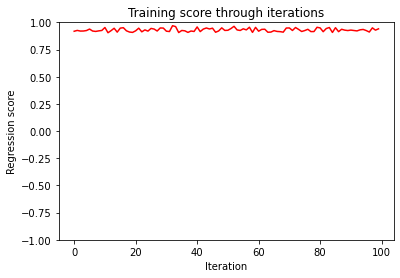

In [126]:
plt.plot(range(0,100),list_train_error , c="red")
plt.xlabel("Iteration")
plt.ylabel("Regression score")
plt.title("Training score through iterations")
plt.ylim([-1,1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

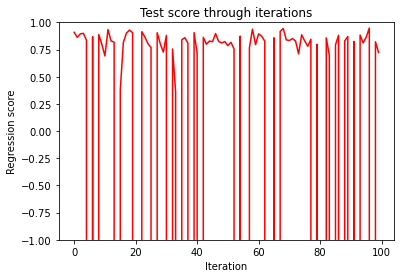

In [127]:
plt.plot(range(0,100),list_test_error , c="red")
plt.xlabel("Iteration")
plt.ylabel("Regression score")
plt.title("Test score through iterations")
plt.ylim([-1,1])
plt.show

The results dont look very promising. Lets try using the one-hot encoded data and see what we get:

## Iterative Regression for Fourier Transform

In [132]:
x_fft = fft(x).real
#Taking only the real part of the fourier transform

In [133]:
list_train_error_fft = []
list_test_error_fft = []
list_test_pr_fft = []
for i in range(0,100):
    #The random state is varying 
    x_train,x_test,y_train,y_test = train_test_split(x_fft,y,test_size = 0.25,random_state = i)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    prediction = reg.predict(x_test)
    list_train_error_fft.append(reg.score(x_train,y_train))
    list_test_error_fft.append(reg.score(x_test,y_test))
    corr, _ = pearsonr(y_test, prediction)
    list_test_pr_fft.append(corr)

<function matplotlib.pyplot.show(close=None, block=None)>

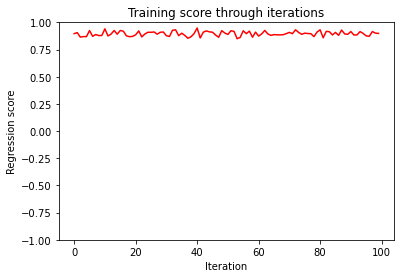

In [134]:
plt.plot(range(0,100),list_train_error_fft , c="red")
plt.xlabel("Iteration")
plt.ylabel("Regression score")
plt.title("Training score through iterations")
plt.ylim([-1,1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

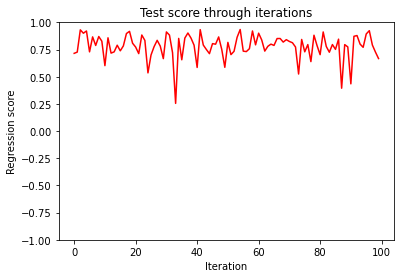

In [135]:
plt.plot(range(0,100),list_test_error_fft , c="red")
plt.xlabel("Iteration")
plt.ylabel("Regression score")
plt.title("Test score through iterations")
plt.ylim([-1,1])
plt.show

**We can very clearly see some very impactful difference if we use Fourier Transform, with the model being more stable across iterations - and this is for a simple linear regression.**

## SVM with Hydrophobicity Index and Fourier Transform

Parameters considered for 5-Fold Cross Validation

In [136]:
parameters = ['linear','poly','rbf','sigmoid']

In [137]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



In [138]:
y_fft = np.array(y)

In [139]:
kf = KFold(n_splits= 5,shuffle = True,random_state = 40)

train_sets_x = []
train_sets_y = []
test_sets_x = []
test_sets_y = []
for train,test in kf.split(x_fft):
    
    train_sets_x.append(x_fft[train])
    train_sets_y.append(y_fft[train])
    test_sets_x.append(x_fft[test])
    test_sets_y.append(y_fft[test])
    

In [140]:
def avg(x):
    return sum(x)/len(x)

In [141]:
scores_train = {}
scores_test = {}
for i in parameters:
    n = 0
    svr = SVR(kernel = i)
    demo_test = []
    demo_train = []
    while n < 5:
        x_train_k = train_sets_x[n]
        y_train_k = train_sets_y[n]
        x_test_k = test_sets_x[n]
        y_test_k = test_sets_y[n]
        svr.fit(x_train_k,y_train_k)
        demo_train.append(svr.score(x_train_k,y_train_k))
        demo_test.append(svr.score(x_test_k,y_test_k))
        n+=1
    scores_train[i] = avg(demo_train)
    scores_test[i] = avg(demo_test)
    

**Average Training Scores for each of the Kernels**

In [142]:
print(scores_train)

{'linear': 0.8846354784197722, 'poly': 0.8514339879569572, 'rbf': 0.7871443479542013, 'sigmoid': 0.4729345728207631}


**Average Test Scores for each of the Kernels**

In [143]:
print(scores_test)

{'linear': 0.8303784300502087, 'poly': 0.7830411197739757, 'rbf': 0.7242712633776763, 'sigmoid': 0.31122856700085044}


**Linear seems to be the best**

#### Iterative SVR Regression ####

In [144]:
list_train_error_svr_fft = []
list_test_error_svr_fft = []
for i in range(0,100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    svr = SVR(kernel = 'linear')
    svr.fit(x_train,y_train)
    list_train_error_svr_fft.append(svr.score(x_train,y_train))
    list_test_error_svr_fft.append(svr.score(x_test,y_test))
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

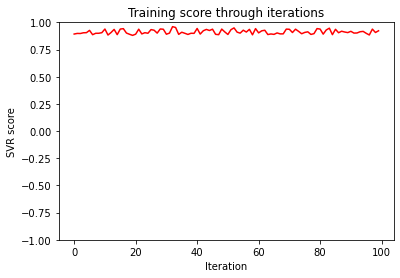

In [145]:
plt.plot(range(0,100),list_train_error_svr_fft , c="red")
plt.xlabel("Iteration")
plt.ylabel("SVR score")
plt.title("Training score through iterations")
plt.ylim([-1,1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

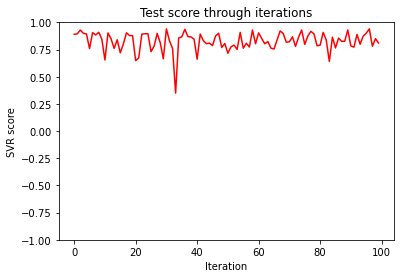

In [146]:
plt.plot(range(0,100),list_test_error_svr_fft , c="red")
plt.xlabel("Iteration")
plt.ylabel("SVR score")
plt.title("Test score through iterations")
plt.ylim([-1,1])
plt.show

**SVR gives us much more promising results when in tandem with FFT.**

**Now, lets test it on the original train and test dataset split**

**Training Score for Linear SVR on the multi-mutant test set**

In [147]:
svr_fft = SVR(kernel = "linear")
svr_fft.fit(fft_x_train,train_data["G"])
svr_fft.score(fft_x_train,train_data["G"])

0.7160190789755422

In [148]:
svr_fft.predict(fft_x_test)

array([-1.53731892, -0.98034462, -1.62772786, -1.58501003, -1.4747318 ,
       -2.23239327, -1.5589967 , -0.91775749, -1.67541896, -1.0020224 ,
       -1.56514073, -0.89174416, -1.64940563, -1.5224229 , -2.28008437,
       -1.60668781, -2.16980614, -1.49640957, -2.25407104, -1.61283184,
       -0.93943527, -1.69709674, -1.5868185 , -1.54410068, -2.21749725,
       -2.30176215, -2.19148391, -2.23917502])

In [92]:
epi_result = pd.read_csv("svr_hydrophobicity_fourier.csv",encoding='cp1252')
epi_result

,Additive value,Ground Truth,Prediction,Status
0,-1.82,-1.680,-1.537319,Predicts Negative
1,-1.08,-0.870,-0.980345,Predicts Negative
2,-1.50,-1.680,-1.627728,Predicts Positive
3,-2.05,-1.840,-1.585010,Predicts Negative
4,-1.94,-1.670,-1.474732,Predicts Negative
5,-2.47,-2.190,-2.232393,Predicts Negative
6,-1.82,-1.930,-1.558997,Doesn’t Predict Positive
7,-1.20,-0.900,-0.917757,Predicts Negative
8,-1.73,-1.300,-1.675419,Predicts Negative
9,-1.08,-0.980,-1.002022,Predicts Negative


We can see that this model predicts all the negative epistasis instances and a few postive epistasis instances - an improvement from last time, proving the strength of Fourier Transform

**Test Score for Linear SVR on the multi-mutant test set**

In [149]:
svr_fft.score(fft_x_test,test_data["G"])

0.6651930940890364

## Conclusion:

Just by changing the AAindex and incorporating Fourier Transform, we obtained some promising results. As we stated before, R2 score is not the main criteria for deciding on a superior model; its going to be a combination of R2 score and the capability to predict the correct epistatic state. 

We repeated this experiment on a selected few AAindexes which we felt may be pertinent to this problem. In my next post, we will go through the results obtained and choose the best performing model.